Series和DataFrame都有一个用于生成各类图表的plot方法。默认情况下，它们所生成的是线形图

In [ ]:
.plot()

## 线形图

简单的Series图表示例,plot()

In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
s = Series(data=np.random.randint(0,10, size=10))
s

0    7
1    2
2    2
3    2
4    9
5    4
6    5
7    5
8    8
9    7
dtype: int32

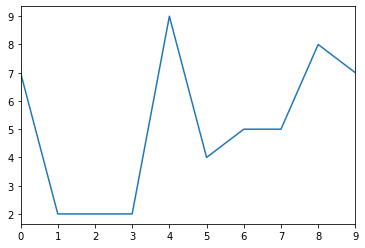

In [3]:
s.plot()

简单的DataFrame图表示例,plot()

- 图例的位置可能会随着数据的不同而不同

In [4]:
def make_df(index, cols):
    df = DataFrame({key: [key + str(i) for i in index] for key in cols})
    df.index = index
    return df

In [5]:
df = make_df([1,2,3,4], list('ABCD'))
df

,A,B,C,D
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4


In [12]:
index = ['张三', '李四', '王五', '赵六']
columns = ['语文', '数学', '英语', 'python']
data = np.random.randint(0,150, size=(4,4))
df = DataFrame(data=data, index=index, columns=columns)
df

,语文,数学,英语,python
张三,18,69,121,22
李四,127,133,81,50
王五,117,33,23,7
赵六,67,78,66,25


e:\1901\.env\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24352 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\1901\.env\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 19977 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\1901\.env\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26446 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\1901\.env\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 22235 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\1901\.env\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 29579 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\1901\.env\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20116 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\1901\.env\lib\site-

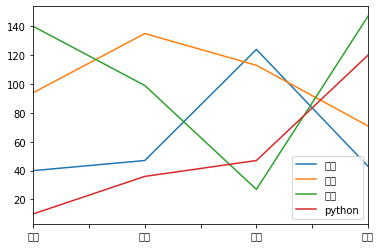

In [7]:
df.plot()

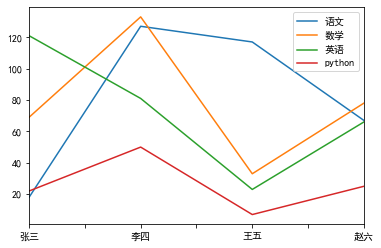

In [13]:
# 显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False  # 解决中文字体下负号不能正常显示的问题
df.plot()

## 柱状图

Series柱状图示例,kind = 'bar'/'barh'

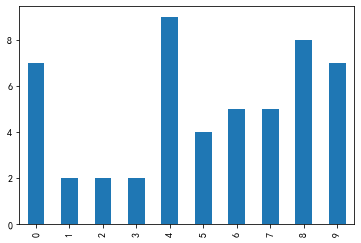

In [14]:
s.plot(kind='bar')

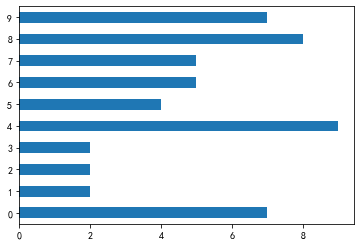

In [15]:
s.plot(kind='barh')

DataFrame柱状图示例

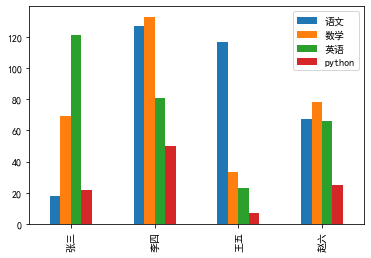

In [16]:
df.plot(kind='bar')

读取文件tips.csv，查看每天的聚会人数情况
每天各种聚会规模的比例  

求和并df.sum()，注意灵活使用axis

In [19]:
tips = pd.read_csv('../data/tips.csv')
tips.set_index('day', inplace=True)

tips

,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Stat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [27]:
16 / 19

0.8421052631578947

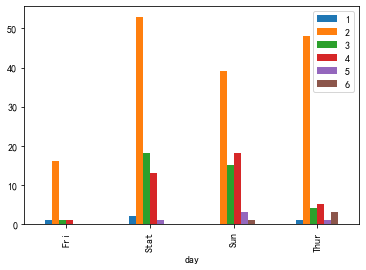

In [20]:
tips.plot(kind='bar')

In [23]:
# 求出每一行的和
tips_sum = tips.sum(axis=1)

In [25]:
tips_sum

day
Fri     19
Stat    87
Sun     76
Thur    62
dtype: int64

In [24]:
tips / tips_sum

,1,2,3,4,5,6,Fri,Stat,Sun,Thur
day,,,,,,,,,,
Fri,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Thur,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
result = tips.divide(tips_sum, axis='index')

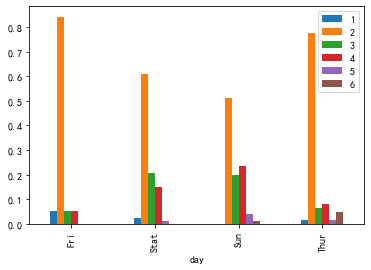

In [29]:
result.plot(kind='bar')

## 直方图

rondom生成随机数百分比直方图，调用hist方法

- 柱高表示数据的频数，柱宽表示各组数据的组距
- 参数bins可以设置直方图方柱的个数上限，越大柱宽越小，数据分组越细致
- 设置normed参数为True，可以把频数转换为概率

In [ ]:
直方图长得和柱状图一样 ,但是y轴表示的数据是数据出现的频数.

In [31]:
s

0    1
1    1
2    2
3    3
4    3
5    4
6    5
7    6
8    6
9    7
dtype: int64

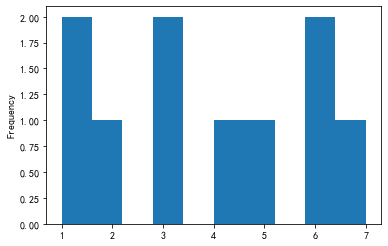

In [30]:
s = Series([1,1,2,3,3,4,5,6,6,7])
s.plot(kind='hist')

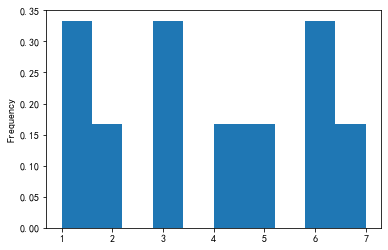

In [35]:
s.plot(kind='hist', density=True)

In [36]:
0.2 /0.6
加上density=True之后, 直方图的y值,就变成了数字出现的概率/组距

0.33333333333333337

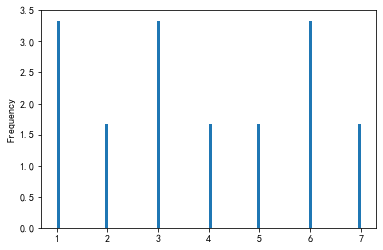

In [34]:
s.plot(kind='hist', bins=100, density=True)

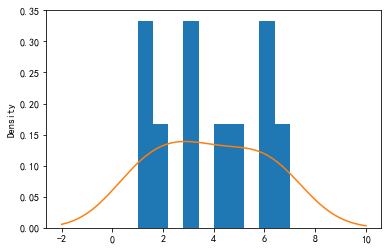

In [39]:
s.plot(kind='hist', bins=10, density=True)
s.plot(kind='kde') # kernel density estimate

kde图：核密度估计，用于弥补直方图由于参数bins设置的不合理导致的精度缺失问题

#### 练习

绘制一个由两个不同的正态分布组成的的双峰分布

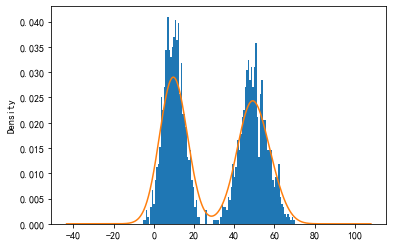

In [41]:
n1 = np.random.normal(loc=10, scale=5, size=1000)
n2 = np.random.normal(loc=50, scale=7, size=1000)
n = np.hstack((n1,n2))
s = Series(data=n)
s.plot(kind='hist', bins=100, density=True)
s.plot(kind='kde')


## 散布图(散点图)

散布图
散布图是观察两个一维数据数列之间的关系的有效方法,DataFrame对象可用 

使用方法：
设置kind = 'scatter'，给明标签columns

In [42]:
df = DataFrame({'A': np.random.randn(1000), 'B': np.random.randn(1000), 'C': np.random.randn(1000), 'D': np.random.randn(1000)})

df.head()

,A,B,C,D
0,-0.647307,-0.152472,0.676303,1.256159
1,-0.640970,-0.993949,0.384336,-0.546815
2,1.536411,-2.234817,2.389974,1.126993
3,-2.566682,0.081160,1.919783,0.107403
4,-0.574120,-0.117627,1.108674,1.150944


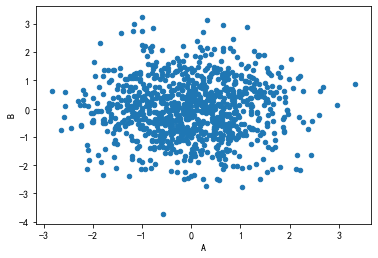

In [43]:
df.plot(x='A', y='B', kind='scatter')

散布图矩阵，当有多个点时，两两点的关系  

使用函数：pd.plotting.scatter_matrix(),
- 参数diagnol：设置对角线的图像类型

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000023194748>,
      dtype=object)

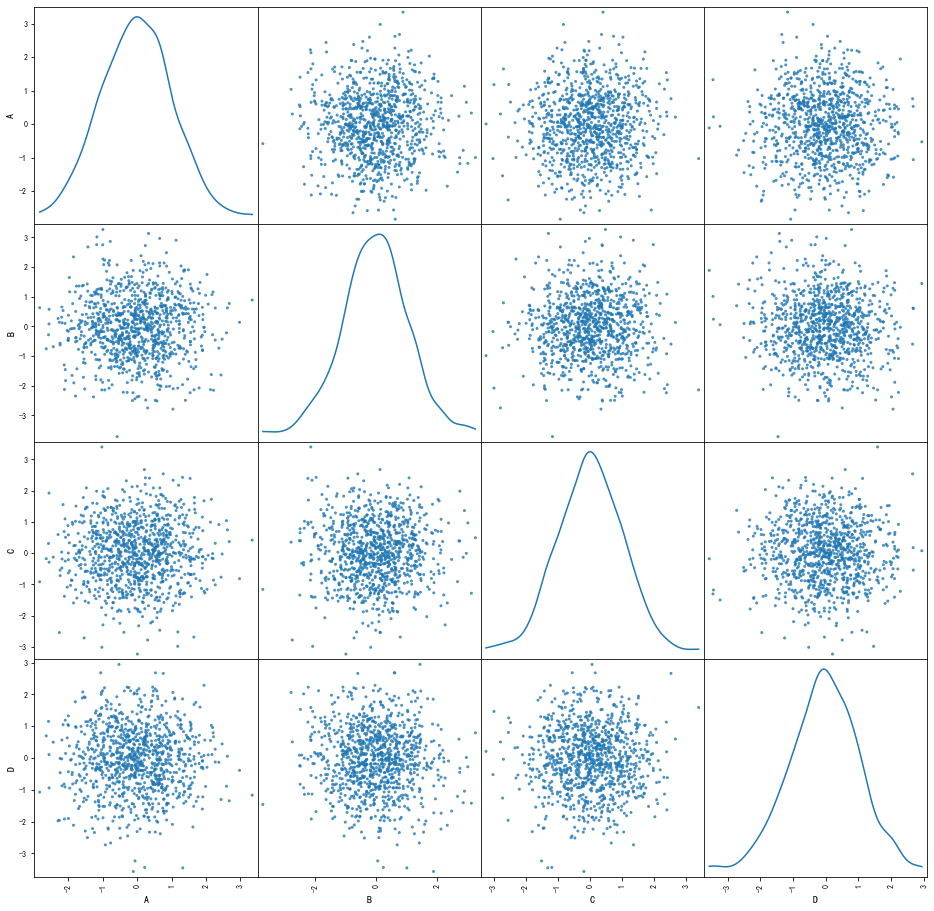

In [47]:
pd.plotting.scatter_matrix(df, figsize=(16,16), diagonal='kde', alpha=0.8)